# **Section 1 - Funnel Analysis**

In [45]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import streamlit as st

## 1.Identify and appropriately handle the missing/blank and duplicate values in the dataset.

In [ ]:
# Load the WorkerFunnel sheet in dataframe'funnel'
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name='WorkerFunnel')

In [ ]:
print(funnel.head())

                  Date Quarter Department Targeted Productivity Overtime  \
0  2015-01-01 00:00:00      Q1     Sewing                   0.8     7080   
1  2015-01-01 00:00:00      Q1  Finishing                  0.75      960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
3  2015-01-01 00:00:00      Q1     Sewing                   0.8     3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.8     1920   

  No. of Workers Actual Productivity  
0             59            0.940725  
1              8              0.8865  
2           30.5             0.80057  
3           30.5             0.80057  
4             56                 NaN  


In [ ]:
funnel.shape

(1197, 7)

In [ ]:
print(funnel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB
None


In [ ]:
# Check for missing values
missing_values = funnel.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      29
dtype: int64


In [ ]:
# Check for duplicates
duplicates = funnel.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 35


In [ ]:
funnel.dropna(inplace=True)

In [ ]:
funnel.drop_duplicates(inplace=True)

In [ ]:
funnel.shape

(1133, 7)

In [ ]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1133 non-null   object
 1   Quarter                1133 non-null   object
 2   Department             1133 non-null   object
 3   Targeted Productivity  1133 non-null   object
 4   Overtime               1133 non-null   object
 5   No. of Workers         1133 non-null   object
 6   Actual Productivity    1133 non-null   object
dtypes: object(7)
memory usage: 70.8+ KB


# explaining logic behind  strategy
  
  For handling missing blank and duplicate value we use EDA(Exploratory Data Analysis) to check the data structure, checking missing values, duplicates. because missing values is minimal so to drop them can't affect data analysis.

## 2.Principal Component Analysis (PCA)

In [ ]:
features = funnel[['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']]

In [ ]:
features = features.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Check if there are any NaN values created by the coercion
print(features.isnull().sum())

# Handle missing values (e.g., filling with the mean of the column)
features = features.fillna(features.mean())

Targeted Productivity    1
Overtime                 1
No. of Workers           1
Actual Productivity      1
dtype: int64


In [ ]:
# Now standardize the features
scaler = StandardScaler()
x_standardized = scaler.fit_transform(features)

In [ ]:
pca = PCA()
principal_components = pca.fit_transform(x_standardized)

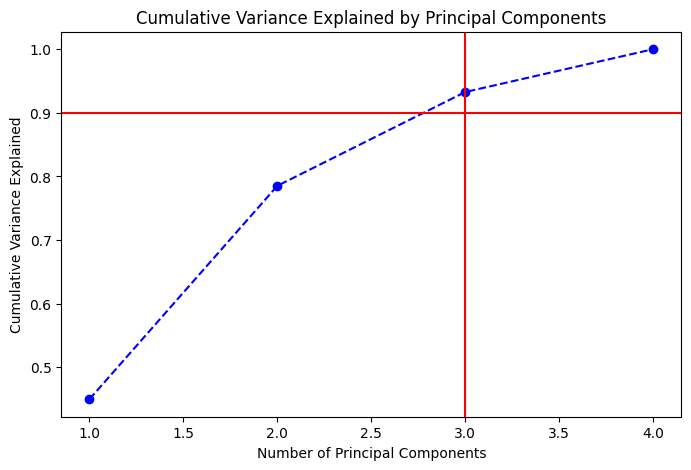

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

num_components = len(cumulative_variance[cumulative_variance <= 0.90]) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=num_components, color='r', linestyle='-')
plt.show()

In [ ]:
print(f"Number of components that explain at least 90% of the variance: {num_components}")

Number of components that explain at least 90% of the variance: 3


## Explanation of Strategy:
Imputation with Mean: Imputing missing values with the mean of the column is a common strategy when the missing data is not extensive and is assumed to be missing at random. It ensures that all data points can be used in the analysis without introducing significant bias.

## 3.Predictive Modeling and Time Series Analysis

In [ ]:
funnel['Date'] = pd.to_datetime(funnel['Date'])
funnel.set_index('Date', inplace=True)

In [ ]:
# Extract the Actual Productivity time series
productivity = funnel['Actual Productivity']

In [ ]:
productivity = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

In [ ]:
productivity = productivity.dropna()

In [ ]:
# Build the ARIMA model (order can be (p,d,q), for example (1,1,1))
model = ARIMA(productivity, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [ ]:
# Forecast the next 4 quarters (4 weeks)
forecast = model_fit.forecast(steps=4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAPE: 0.2952094586408214
MSE: 0.026281429762744706


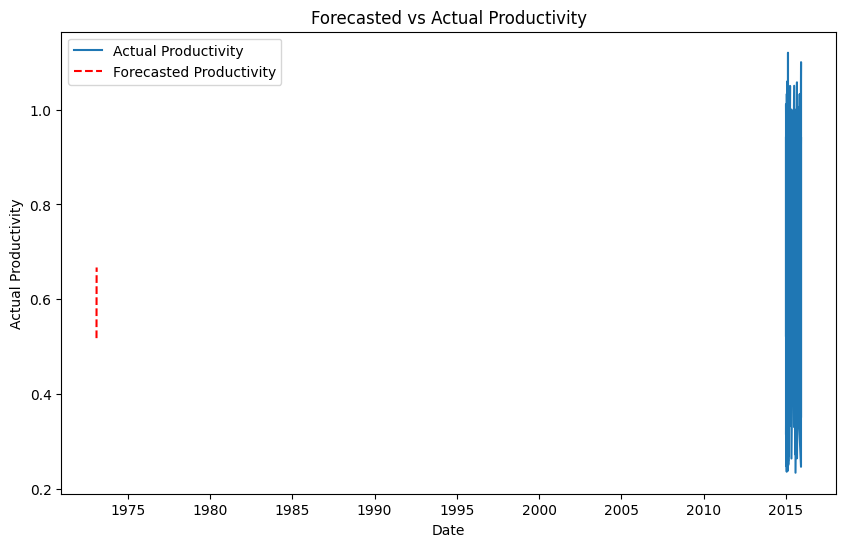

In [ ]:
# Evaluate the model using MAPE and MSE
actual = productivity[-4:]  # Last 4 actual data points for comparison

mape = mean_absolute_percentage_error(actual, forecast[:len(actual)])
mse = mean_squared_error(actual, forecast[:len(actual)])

print(f"MAPE: {mape}")
print(f"MSE: {mse}")

# Visualize the forecasted vs actual productivity values
plt.figure(figsize=(10, 6))
plt.plot(productivity, label='Actual Productivity')
plt.plot(forecast.index, forecast, label='Forecasted Productivity', color='red', linestyle='--')
plt.title('Forecasted vs Actual Productivity')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

## Explanation:
pd.to_numeric() Function: Converts the Actual Productivity column to numeric values, with the errors='coerce' parameter ensuring that any non-numeric values are converted to NaN.
dropna() Method: Removes any rows with NaN values after the conversion, ensuring that the data passed to the ARIMA model is clean.

## 4.Clustering Analysis

In [ ]:
# Extract relevant features
features = funnel[['Actual Productivity', 'Overtime', 'No. of Workers']]

In [ ]:
# Convert to numeric and handle missing values
features = features.apply(pd.to_numeric, errors='coerce')
features = features.fillna(features.mean())

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

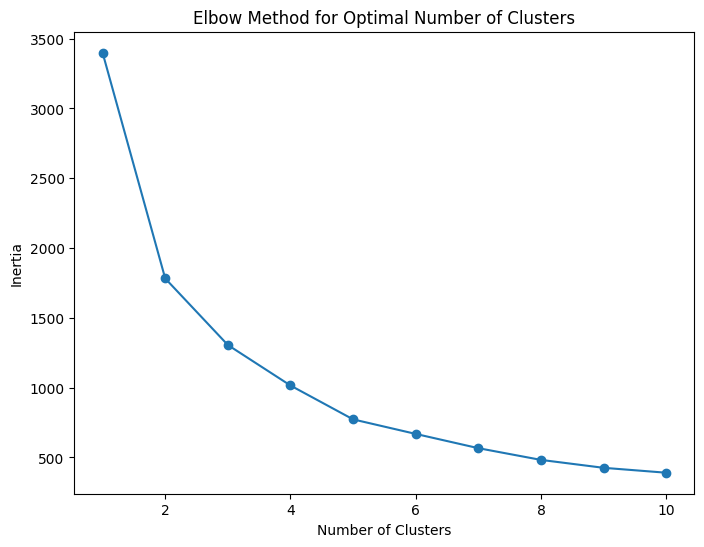

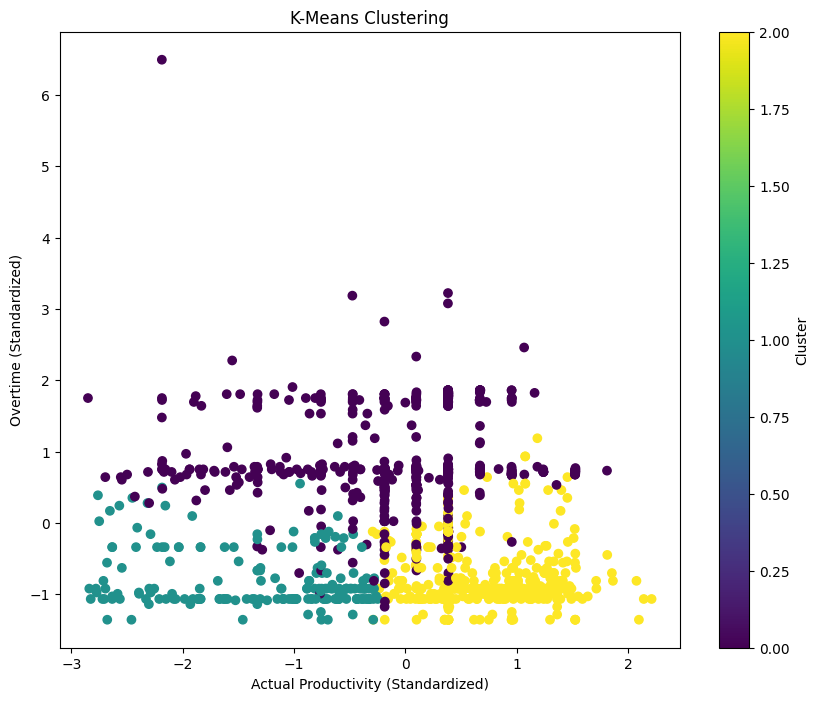

In [ ]:
# (i) Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# (ii) Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# (iii) Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Actual Productivity (Standardized)')
plt.ylabel('Overtime (Standardized)')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

## Interpretation:
Elbow Method: The plot helps identify the optimal number of clusters. The point where the plot starts to flatten is typically the best choice.
Cluster Visualization: This shows how the data points are grouped into clusters, which can be analyzed to understand the productivity dynamics of different segments of workers.

## 5.Budget Allocation Strategy (Bonus)

In [ ]:
print(funnel.columns)


Index(['Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')


In [ ]:
# Convert 'Targeted Productivity' to numeric type, handling errors
funnel['Targeted Productivity'] = pd.to_numeric(funnel['Targeted Productivity'], errors='coerce')

# Check for non-numeric values in 'Actual Productivity'
print(funnel['Actual Productivity'].apply(type).value_counts())

# If there are non-numeric values, convert them to numeric type
# For example, if they are strings representing numbers:
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

# Calculate Department Value
funnel['Department Value'] = funnel['Actual Productivity'] / funnel['Targeted Productivity']

print(funnel.columns)

Actual Productivity
<class 'float'>    1132
<class 'str'>         1
Name: count, dtype: int64
Index(['Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity', 'Department Value'],
      dtype='object')


In [ ]:
# Summarize the Department Values
department_values = funnel.groupby('Department')['Department Value'].mean().reset_index()

In [ ]:
# Sort departments by their value (highest to lowest)
department_values = department_values.sort_values(by='Department Value', ascending=False)

In [ ]:
# Print or visualize department values
print(department_values)

# Propose a new budget allocation strategy
# Assuming you want to reallocate based on department value
total_budget = 8.4 * 100000  # Rs. 8.4 lakh in rupees
department_values['Proposed Budget'] = (department_values['Department Value'] / department_values['Department Value'].sum()) * total_budget

print(department_values[['Department', 'Proposed Budget']])

  Department  Department Value
0  Finishing          1.042290
1     Sewing          1.003129
  Department  Proposed Budget
0  Finishing    428041.157541
1     Sewing    411958.842459


# Section 2 - Anomaly detection

## 1.Data Import and Exploration

In [7]:
# Load the WorkerFunnel sheet in dataframe'funnel'
transactions = pd.read_excel('AssignmentData.xlsx', sheet_name='creditcard')

In [8]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Check the structure of the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Describe the dataset to understand the basic statistics
transactions.describe()

,Time,V1,V3,V4,V5,V6,V8,V10,V11,V12,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.156799e-15,-1.389117e-15,2.112416e-15,1.048624e-15,1.491305e-15,1.159593e-16,2.236957e-15,1.699672e-15,-1.240625e-15,...,6.414686e-16,1.620636e-16,-3.548635e-16,2.647505e-16,5.277047e-16,1.687691e-15,-3.658407e-16,-1.217847e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.194353e+00,1.088850e+00,1.020713e+00,9.992014e-01,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-7.321672e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-2.086297e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,2.235804e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,3.273459e-01,4.539234e-01,7.395934e-01,6.182380e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,2.000721e+01,2.374514e+01,1.201891e+01,7.848392e+00,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# Count the number of fraudulent and non-fraudulent transactions
class_distribution = transactions['Class'].value_counts()
print(class_distribution)

Class
0    284315
1       492
Name: count, dtype: int64


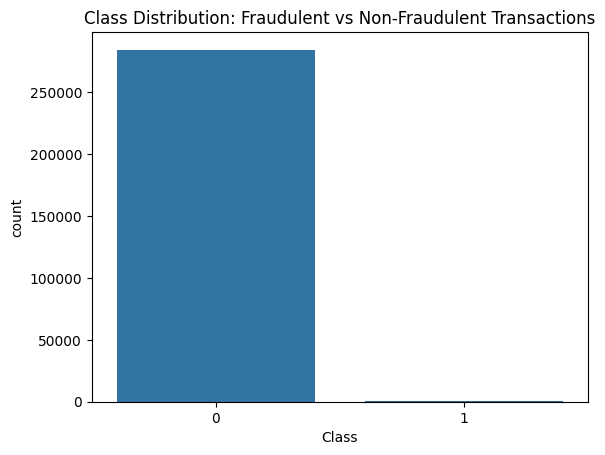

In [12]:
sns.countplot(x='Class', data=transactions)
plt.title('Class Distribution: Fraudulent vs Non-Fraudulent Transactions')
plt.show()

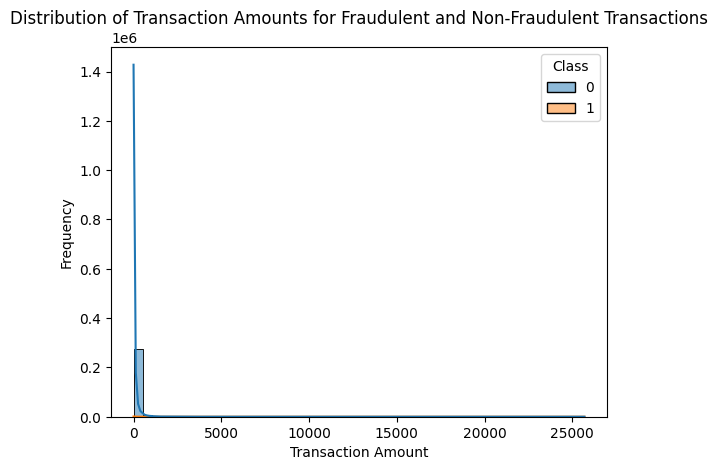

In [13]:
# Visualize the distribution of transaction amounts for both classes
sns.histplot(data=transactions, x='Amount', hue='Class', kde=True, bins=50)
plt.title('Distribution of Transaction Amounts for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Class Distribution:
 The Class distribution plot will help you see the balance between fraudulent (1) and non-fraudulent (0) transactions.
Transaction Amounts Distribution: The histogram will show how transaction amounts differ between fraudulent and non-fraudulent transactions. Often, fraudulent transactions might have different patterns in terms of amount compared to non-fraudulent ones.

## 2.Feature Engineering

In [14]:
# Initialize the scaler
scaler = StandardScaler()

In [15]:
# Scale the Amount and Time features
transactions['Amount_Scaled'] = scaler.fit_transform(transactions[['Amount']])
transactions['Time_Scaled'] = scaler.fit_transform(transactions[['Time']])

In [16]:
# Drop the original columns if needed
transactions = transactions.drop(['Amount', 'Time'], axis=1)

In [17]:
transactions.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled,Time_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [18]:
# Separate the features (excluding the 'Class' column)
features = transactions.drop('Class', axis=1)

In [20]:
# Identify non-numeric columns or values
non_numeric_columns = features.select_dtypes(exclude=['number']).columns

# Drop or handle non-numeric columns or values
features = features.drop(columns=non_numeric_columns)

In [21]:
# Convert all columns to numeric, coercing errors (strings, etc.) to NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after coercion
features = features.dropna()

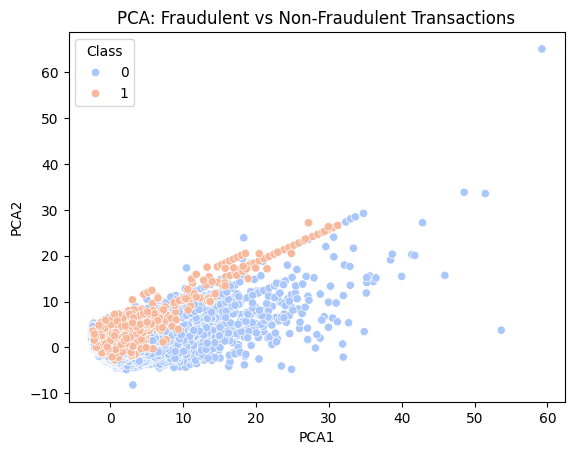

In [22]:
# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(features)

# Add the PCA components to the dataframe
transactions['PCA1'] = pca_transformed[:, 0]
transactions['PCA2'] = pca_transformed[:, 1]

# Visualize the PCA-transformed data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='PCA1', y='PCA2', hue=transactions['Class'], palette='coolwarm', data=transactions)
plt.title('PCA: Fraudulent vs Non-Fraudulent Transactions')
plt.show()

## Justification for Scaling Method
Standardization: This method was chosen because it is effective when the data has outliers or when the features have different units or scales. Since Amount can have a wide range and Time is continuous, standardizing ensures that both features contribute equally to the analysis.

PCA: PCA was used to reduce the dimensionality of the dataset, allowing us to visualize the data in two dimensions. This helps to identify patterns or clusters that might indicate fraudulent behavior.

## Explanation
Data Cleaning: This step ensures that only numeric data is passed to the PCA algorithm, avoiding conversion errors.
PCA: The PCA transformation reduces the dimensionality of your dataset to 2 components for visualization purposes.
Visualization: The scatter plot then shows how the fraudulent and non-fraudulent transactions are distributed in the reduced feature space, providing insights into the separation between the two classes.

## 3.Anomaly Detection Model

In [24]:
# Separate features and labels
X = transactions.drop('Class', axis=1)
y = transactions['Class']

In [26]:
X = X.apply(pd.to_numeric, errors='coerce')

In [27]:
X = X.dropna()

In [28]:
# Initialize and fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

In [29]:
# Convert predictions to binary (1 for anomalies, 0 for normal)
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]

In [30]:
# Initialize and fit the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X)

In [33]:
# Assuming 'y' is a pandas Series, convert it to a list with the same length as y_pred_if
y_list = y.tolist()[:len(y_pred_if)]

# Isolation Forest Evaluation
print("Isolation Forest Classification Report")
print(classification_report(y_list, y_pred_if))

Isolation Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.16      0.20       487

    accuracy                           1.00    284802
   macro avg       0.64      0.58      0.60    284802
weighted avg       1.00      1.00      1.00    284802



In [35]:
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows that contain NaN values after conversion
X_clean = X.dropna()

# Align y with X_clean by dropping the same rows
y_clean = y[X_clean.index]

In [36]:
# Initialize and fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_if = isolation_forest.fit_predict(X_clean)

# ROC-AUC for Isolation Forest
roc_auc_if = roc_auc_score(y_clean, y_pred_if)
print("Isolation Forest ROC-AUC: ", roc_auc_if)

Isolation Forest ROC-AUC:  0.42007772776366575


## Discussing the Results
After running the models, you will get the classification report, including Precision, Recall, and F1-Score, for each model.

Precision: Indicates the proportion of true positive predictions among all positive predictions. High precision means fewer false positives.

Recall: Indicates the proportion of true positive predictions among all actual positive cases. High recall means fewer false negatives.

F1-Score: Harmonic mean of Precision and Recall, providing a balance between the two.

ROC-AUC: Measures the model's ability to distinguish between classes. A higher value indicates better performance.

## Visualizing Anomalies

In [39]:
# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

In [40]:
# Add the predictions to the PCA-transformed DataFrame
X_pca_df['IsolationForest'] = y_pred_if
X_pca_df['LOF'] = y_pred_lof

# Add the true labels for comparison
X_pca_df['TrueLabels'] = y

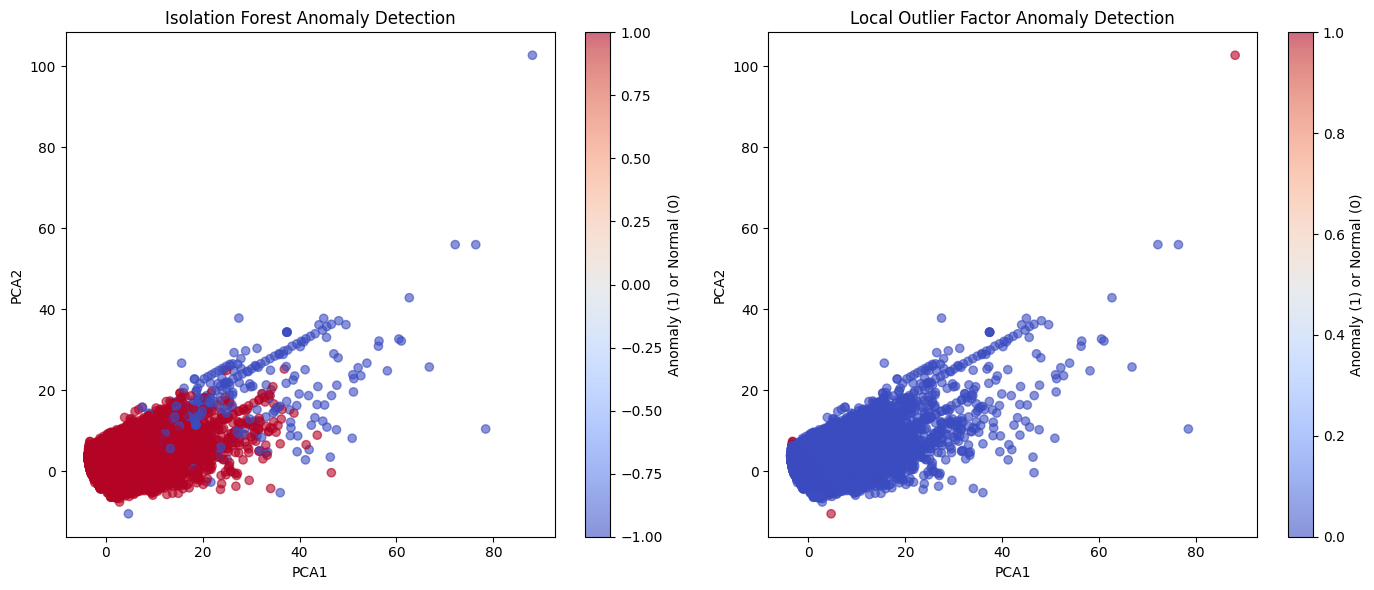

In [41]:
plt.figure(figsize=(14, 6))

# Plotting Isolation Forest results
plt.subplot(1, 2, 1)
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=X_pca_df['IsolationForest'], cmap='coolwarm', alpha=0.6)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Anomaly (1) or Normal (0)')

# Plotting Local Outlier Factor results
plt.subplot(1, 2, 2)
plt.scatter(X_pca_df['PCA1'], X_pca_df['PCA2'], c=X_pca_df['LOF'], cmap='coolwarm', alpha=0.6)
plt.title('Local Outlier Factor Anomaly Detection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Anomaly (1) or Normal (0)')

plt.tight_layout()
plt.show()

## 5.function that accepts a new dataset of credit card transactions

In [50]:
def detect_fraud(transactions_df, trained_model):
    # Ensure the input is in numeric format
    transactions_df = transactions_df.apply(pd.to_numeric, errors='coerce')

    # Drop rows with missing values
    transactions_df_clean = transactions_df.dropna()

    # Predict anomalies (fraudulent transactions)
    predictions = trained_model.predict(transactions_df_clean)

    # Get indices of fraudulent transactions
    fraudulent_indices = transactions_df_clean[predictions == -1].index

    # Return the fraudulent transactions
    fraudulent_transactions = transactions_df.loc[fraudulent_indices]

    return fraudulent_transactions

In [47]:
# Load your trained model here (for example purposes, I'll assume you have an IsolationForest model)
isolation_forest = IsolationForest(contamination=0.001, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

def detect_fraud(transactions_df, trained_model):
    transactions_df = transactions_df.apply(pd.to_numeric, errors='coerce')
    transactions_df_clean = transactions_df.dropna()
    predictions = trained_model.predict(transactions_df_clean)
    fraudulent_indices = transactions_df_clean[predictions == -1].index
    fraudulent_transactions = transactions_df.loc[fraudulent_indices]
    return fraudulent_transactions

def main():
    st.title("Credit Card Fraud Detection")

    uploaded_file = st.file_uploader("Upload your credit card transactions dataset (CSV or Excel)", type=["csv", "xlsx"])

    if uploaded_file is not None:
        try:
            if uploaded_file.name.endswith('.csv'):
                transactions_df = pd.read_csv(uploaded_file)
            elif uploaded_file.name.endswith('.xlsx'):
                transactions_df = pd.read_excel(uploaded_file, sheet_name='creditcard_test')  # Adjust the sheet name if needed

            st.write("### Uploaded Dataset:")
            st.write(transactions_df.head())

            # Predict fraud
            fraudulent_transactions = detect_fraud(transactions_df, trained_model)

            if not fraudulent_transactions.empty:
                st.write("### Fraudulent Transactions Detected:")
                st.write(fraudulent_transactions)

                # Visualize anomalies
                pca = PCA(n_components=2)
                pca_transformed = pca.fit_transform(transactions_df.dropna())

                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=(transactions_df.index.isin(fraudulent_transactions.index)).astype(int), palette='coolwarm')
                plt.title('PCA: Fraudulent vs Non-Fraudulent Transactions')
                st.pyplot(plt)
            else:
                st.write("No fraudulent transactions detected.")

        except Exception as e:
            st.error(f"An error occurred: {e}")

if __name__ == '__main__':
    main()

2024-08-31 03:44:11.368 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 03:44:11.592 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-31 03:44:11.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 03:44:11.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 03:44:11.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 03:44:11.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 03:44:11.607 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [51]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.59.140:8501

  Stopping...
^C
